In [ ]:
#@title Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time  # Import the time module

In [ ]:
#@title Loading MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
#@title Normalize the pixel values to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#@title Build the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    keras.layers.Dense(256, activation='relu'),   # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to reduce overfitting
    #keras.layers.Dense(128, activation='relu'),    # Additional hidden layer
    #keras.layers.Dropout(0.2),                   # Dropout layer
    keras.layers.Dense(10, activation='linear')  # Output layer with 10 units (1 for each digit)
])

# Compile the model
model.compile(optimizer='adam', # Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
              metrics=['sparse_categorical_accuracy']) # metrics

In [ ]:
#@title Training the model
# Create a callback to stop training early if the validation loss doesn't improve
early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Start the timer
start_time = time.time()

# Train the model with validation data
history = model.fit(
    x_train, y_train, epochs=55, validation_split=0.2, batch_size=256,
    callbacks=[early_stopping_callback]
)

# Stop the timer
end_time = time.time()

# Calculate training time
training_time = end_time - start_time

# Print the training time
print("Training Time: {:.2f} seconds".format(training_time))

Epoch 1/55
188/188 [==============================] - 3s 14ms/step - loss: 0.6374 - sparse_categorical_accuracy: 0.7803 - val_loss: 0.4582 - val_sparse_categorical_accuracy: 0.8411
Epoch 2/55
188/188 [==============================] - 3s 15ms/step - loss: 0.4366 - sparse_categorical_accuracy: 0.8464 - val_loss: 0.4016 - val_sparse_categorical_accuracy: 0.8593
Epoch 3/55
188/188 [==============================] - 2s 11ms/step - loss: 0.3925 - sparse_categorical_accuracy: 0.8604 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 0.8681
Epoch 4/55
188/188 [==============================] - 2s 10ms/step - loss: 0.3633 - sparse_categorical_accuracy: 0.8699 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8661
Epoch 5/55
188/188 [==============================] - 2s 11ms/step - loss: 0.3417 - sparse_categorical_accuracy: 0.8767 - val_loss: 0.3466 - val_sparse_categorical_accuracy: 0.8749
Epoch 6/55
188/188 [==============================] - 2s 11ms/step - loss: 0.3269 - sparse_cate

313/313 [==============================] - 1s 3ms/step - loss: 0.3170 - sparse_categorical_accuracy: 0.8923
Test accuracy: 0.892300009727478


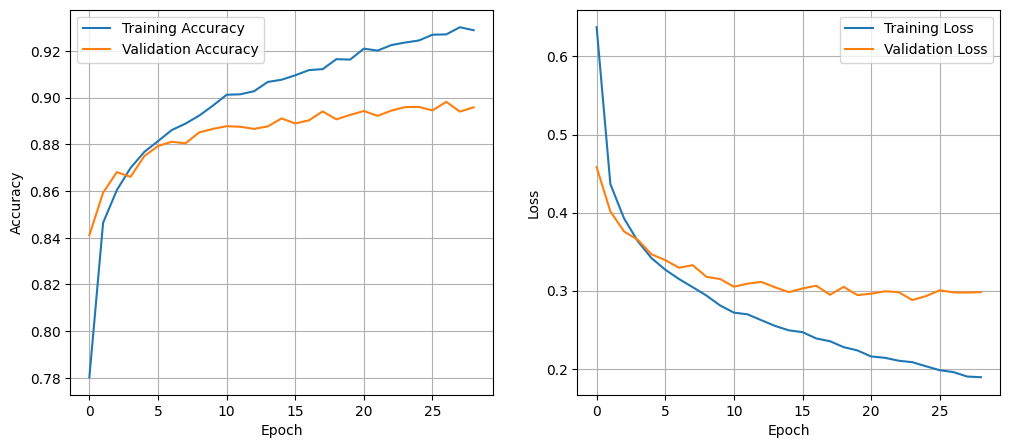

In [ ]:
#@title Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




In [ ]:
#@title Make predictions on test data
predictions = model.predict(x_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
#@title Model Performance Statistics
# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Test Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:\n", class_report)

Test Accuracy: 0.8923
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.83      0.81      1000
           3       0.86      0.93      0.89      1000
           4       0.82      0.81      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.70      0.72      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



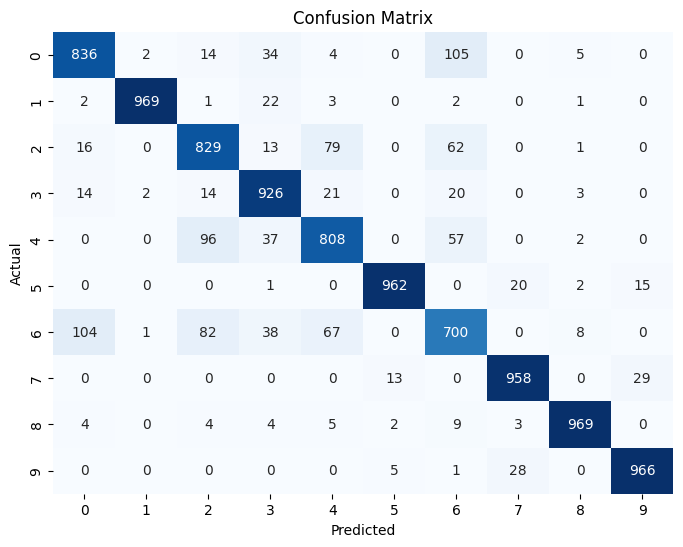

In [ ]:
#@title Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

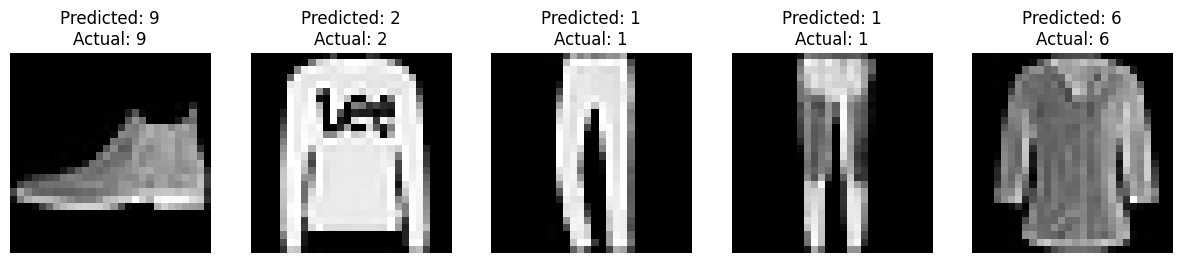

In [ ]:
#@title Display 5 test images with their predicted labels and their true labels
num_samples = 5
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
    plt.axis('off')
plt.show()


Summary and Reflection

1. While working with MNIST Fashion dataset, the dataset should be preprocessed first to carry out further, the pixel values in the dataset were normalized to the range of 0 to 1 by dividing by 255.0
2. Dropout layers and hidden layers should be added as per model's efficiency. The number of neurons and dropout rates helps in improving the model's accuracy, so optimize accordingly.
3. Changing the number of epochs, batch sizes, learning rates and adding early stopping also makes a difference in the model's accuracy.

Challenges

Obtaining optimal hyperparameters required a lot of experimentation with number of neurons, dropout layers, number of epochs and batch sizes.
Model works differently with different hyperparameters, so getting a set of optimal hyperparameters requires iterative process.
Working with other hyperparameters like L2 regularization, normalization, changing batch sizes, grid search, random search, bayesian search, may further help in improving model's accuracy.





